# Description

This gallery notebook is used to verify that `amp/core/plotting` functions display plots correctly.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Imports

In [2]:
import logging

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import core.plotting.visual_stationarity_test as cpvistte
import core.plotting.misc_plotting as cpmiscplt

import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hprint as hprint

/app/core/explore.py:39: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tauton
One and only one set-up config should be true:
is_cmamp_prod=False
is_dev4=False
is_dev_ck=False
is_ig_prod=False
is_inside_ci=False
is_mac=False


# Configure Logger

In [3]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-c17772bd-0177-48e4-b0f0-aca84843430e.json'
-----------------------------------------------------------------------------
This code is not in sync with the container:
code_version='1.4.3' != container_version='1.4.0'
-----------------------------------------------------------------------------
You need to:
- merge origin/master into your branch with `invoke git_merge_master`
- pull the latest container with `invoke docker_pull`
INFO  # Git
  branch_name='SorrTask_413_unit_test_plot_projection_from_coreplottingmisc_plottingpy'
  hash='a1228384d'
  # Last commits:
    * a1228384d Dylan-Celli adding additional columns and rows for graphing                   (    2 days ago) Mon Jul 17 17:45:52 2023  (HEAD -> SorrTask_413_unit_test_plot_projection_from_coreplottingmisc_plottingpy, origin/SorrTask_413_unit_test_plot_projection_from_coreplottingmisc_plottingpy)
    * 74213f67b Dyl

# Plots

## `plot_histograms_and_lagged_scatterplot()`

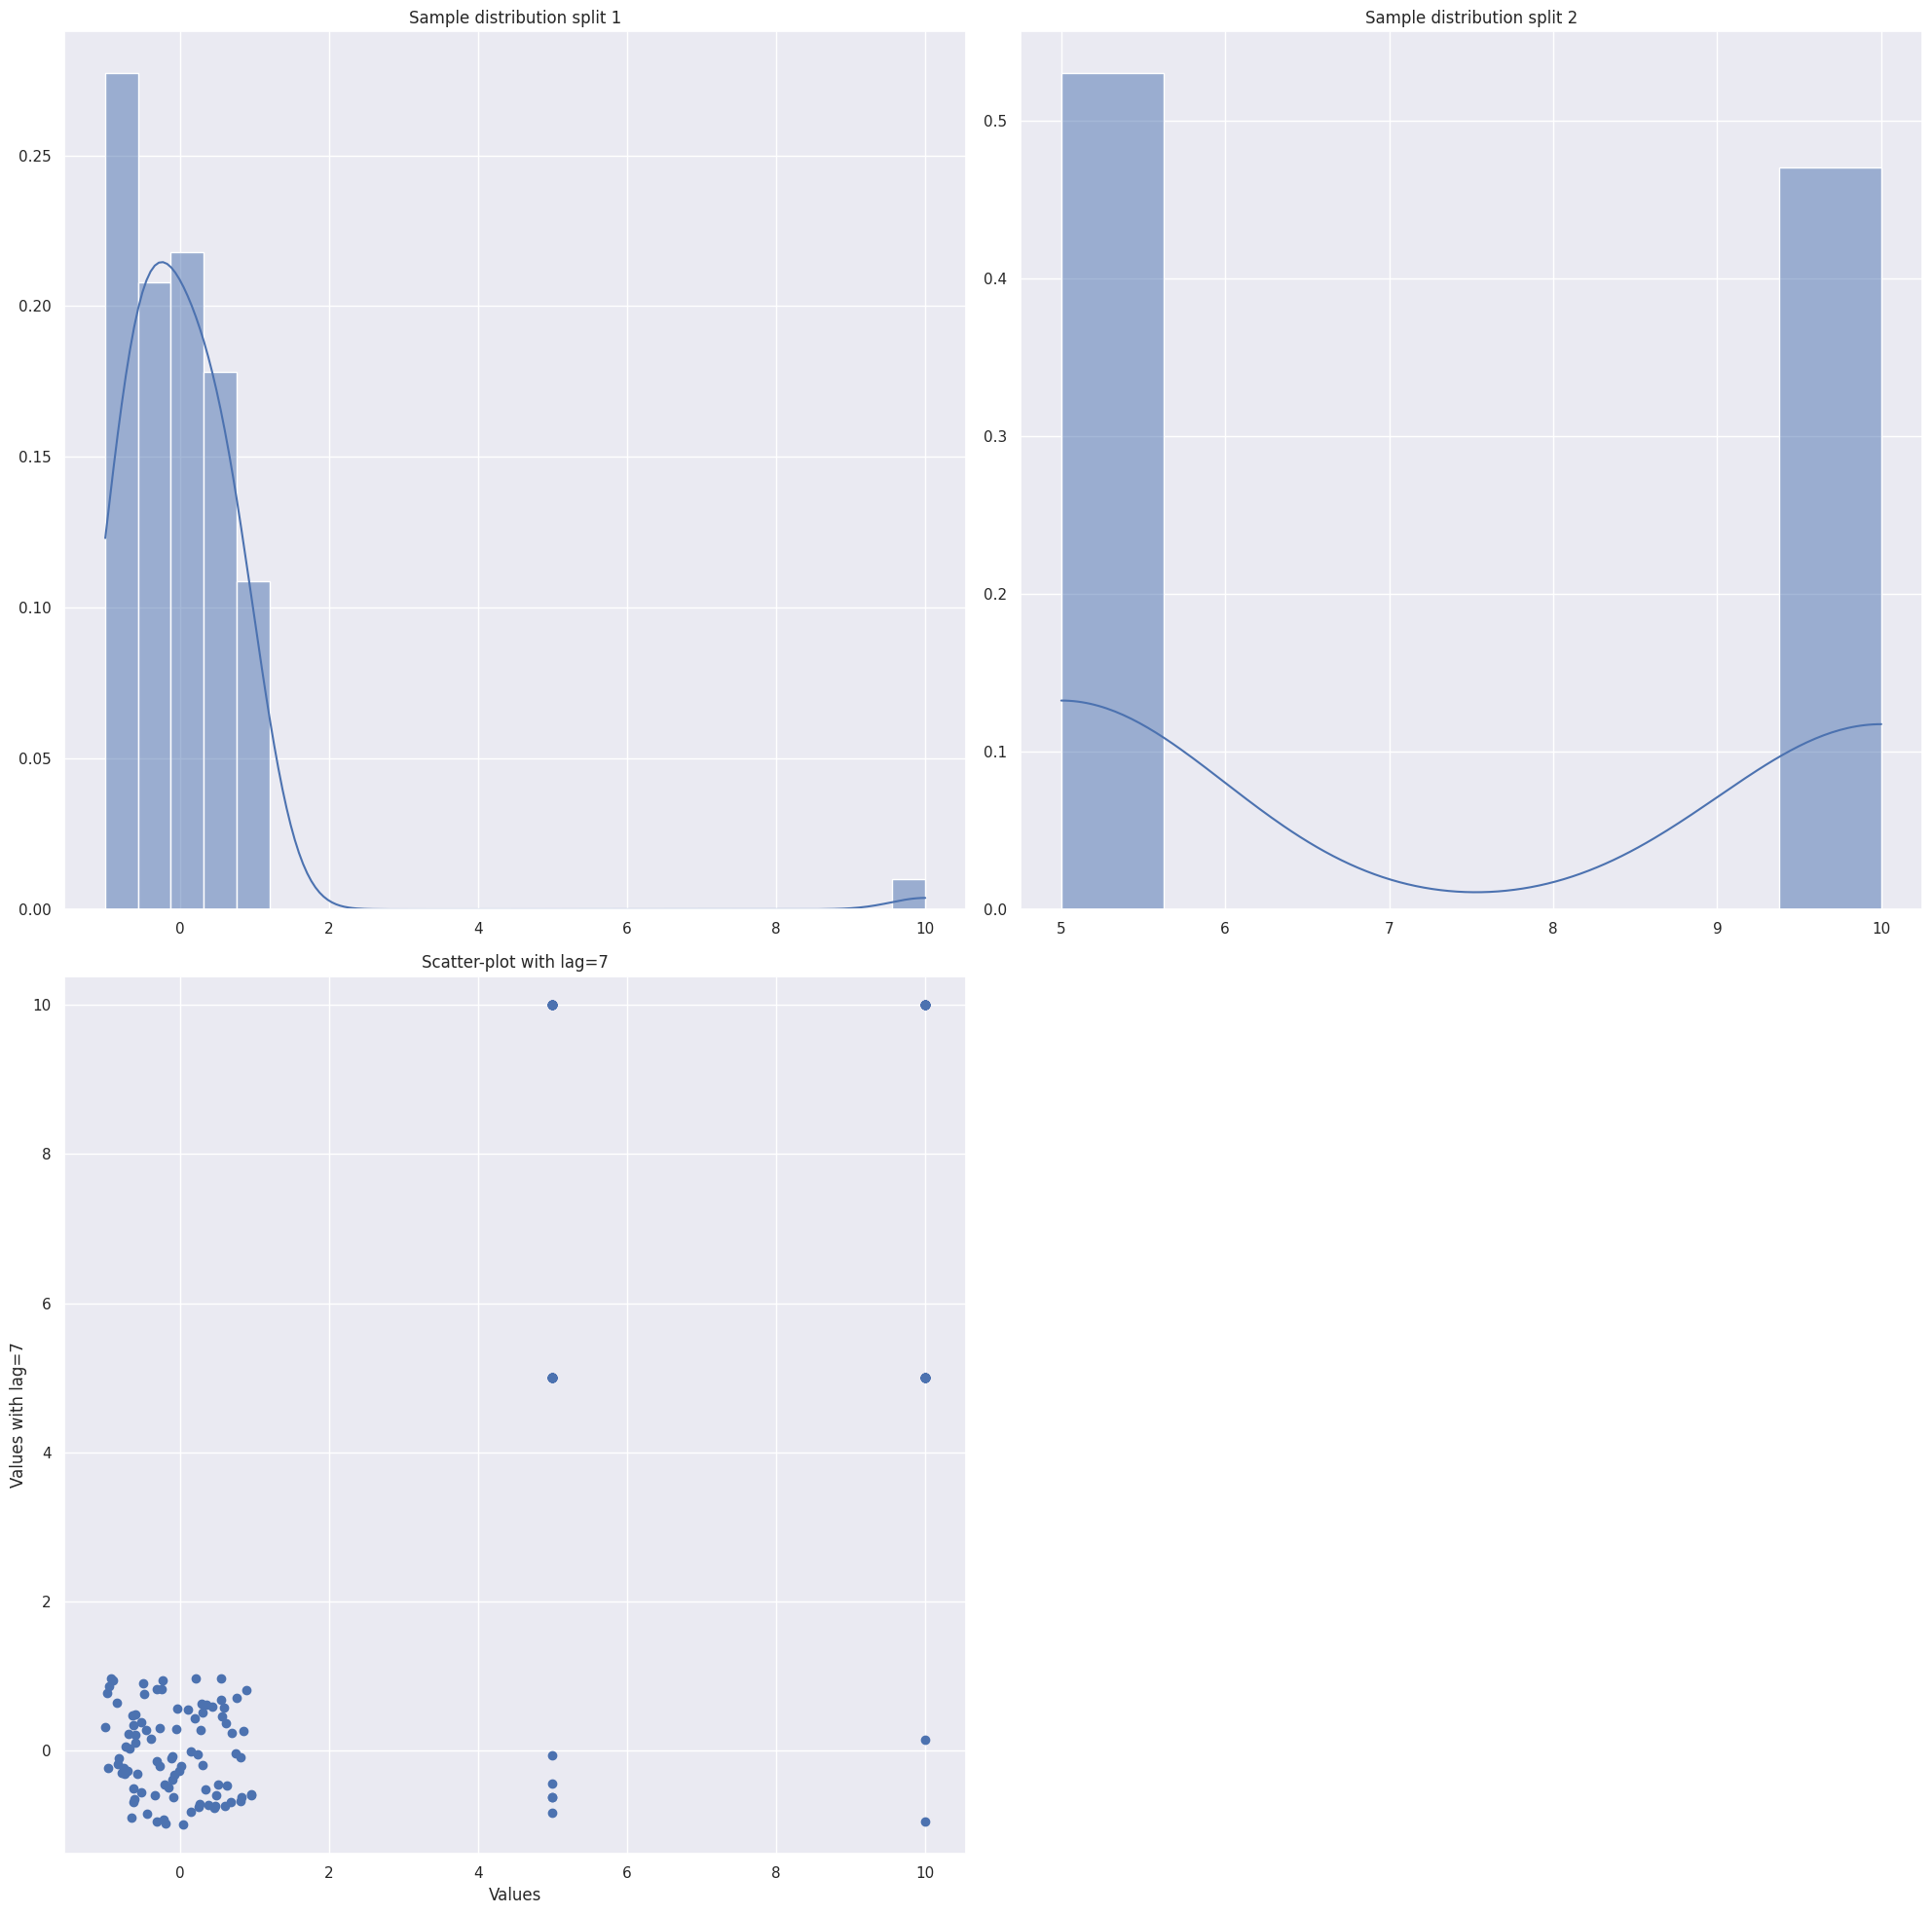

In [4]:
# Set inputs.
seq = np.concatenate([np.random.uniform(-1, 1, 100), np.random.choice([5, 10], 100)])
index = pd.date_range(start="2023-01-01", periods=len(seq), freq="D")
srs = pd.Series(seq, index=index)
lag = 7
# TODO(Dan): Remove after integration with `cmamp`
figsize = (20,20)
# Plot.
cpvistte.plot_histograms_and_lagged_scatterplot(srs, lag, figsize=figsize)

In [ ]:
# Create large dataframe of random ints between 0 and 100.
import pdb
rand_df = pd.DataFrame(np.random.randint(0,100,size=(300, 6)), columns=['y1','y2','y3','y4','y5','y6'])
#fig, ax = plt.subplots()
#ax.plot(range(0, 100), range(0, 100))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
pdb.set_trace()
cpmiscplt.plot_projection(rand_df, special_values = [1000], mode = "scatter", ax = ax)

--Return--
None
> /tmp/ipykernel_178/276771119.py(8)<module>()
      5 #ax.plot(range(0, 100), range(0, 100))
      6 fig = plt.figure()
      7 ax = fig.add_axes([0,0,1,1])
----> 8 pdb.set_trace()
      9 cpmiscplt.plot_projection(rand_df, special_values = [1000], mode = "scatter", ax = ax)

ipdb> b 9
Breakpoint 1 at /tmp/ipykernel_178/276771119.py:9
ipdb> c
    [... skipped 1 hidden frame]

    [... skipped 1 hidden frame]

    [... skipped 1 hidden frame]

    [... skipped 1 hidden frame]

None
> /tmp/ipykernel_178/276771119.py(9)<module>()
      5 #ax.plot(range(0, 100), range(0, 100))
      6 fig = plt.figure()
      7 ax = fig.add_axes([0,0,1,1])
      8 pdb.set_trace()
1---> 9 cpmiscplt.plot_projection(rand_df, special_values = [1000], mode = "scatter", ax = ax)

ipdb> s
--Call--
> /app/core/plotting/misc_plotting.py(163)plot_projection()
    161 
    162 
--> 163 def plot_projection(
    164     df: pd.DataFrame,
    165     special_values: Optional[List[Any]] = None,

ipdb> b 

In [7]:
range_df_2 = rand_df.copy()
for i in range(rand_df.shape[1]):
    range_df_2.iloc[:, i] = i
range_df_2.head(50)

,y1,y2,y3,y4,y5,y6
0,0,1,2,3,4,5
1,0,1,2,3,4,5
2,0,1,2,3,4,5
3,0,1,2,3,4,5
4,0,1,2,3,4,5
5,0,1,2,3,4,5
6,0,1,2,3,4,5
7,0,1,2,3,4,5
8,0,1,2,3,4,5
9,0,1,2,3,4,5
